# Exercise Sheet No. 1

---

> Machine Learning for Natural Sciences, Summer 2022, Jun.-Prof. Pascal Friederich, pascal.friederich@kit.edu
>
> Container version: 1.0.0

---

**Topic**: This exercise sheet will not be graded and serves as an
introduction  to explain the online exercise regulations and to help you to
familiarize yourself with Python, Jupyter and Numpy. The exercises in this
sheet are meant as an appetizer to show you what future exercises could cover.

## Preliminaries
If you are not familiar with Python, you may want to learn more about Python
and its basic syntax. Since there are a lof of free and well written tutorials
 online, we refer you to one of the following online tutorials:

* http://www.datacamp.com/community/tutorials/tutorial-jupyter-notebook
* https://www.learnpython.org/
* https://www.w3schools.com/python/
* https://automatetheboringstuff.com/

## 1.1 Corona (not graded)

*Disclaimer*: If you are in any way personnally affected by the Corona crisis,
you do not have to participate in this exercise. It will not be graded or is
necessary for the progress of this course.

To get to know Python's data science workflows, we briefly analyze the
current  corona epidemic. First download a historical dataset on the corona
infections worldwide from the European Centre for Disease Prevention and
Control  in 2020 ([link](https://www.ecdc.europa.eu/sites/default/files/documents/COVID-19-geographic-disbtribution-worldwide.xlsx)).
We can do this in Python via the ``requests`` package.

In [ ]:
import os

import requests

data_url = "https://www.ecdc.europa.eu/sites/default/files/documents/COVID-19-geographic-disbtribution-worldwide.xlsx"
data_file = "COVID-19-geographic-disbtribution-worldwide.xlsx"
if not os.path.exists(data_file):
    print("Downloading dataset ...")
    with open(data_file, "wb") as f:
        f.write(requests.get(data_url).content)
    print("Downloading dataset done.")

Now, we load the dataset via the data library ``pandas``, which will return a ``DataFrame`` object. We print the head of the table with ``.head()``:

In [ ]:
import pandas as pd
import numpy as np

corona_world = pd.read_excel(data_file)
corona_world.to_csv ("corona_world.csv", index = None, header=True)
corona_world.head()

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
0,2020-12-14,14,12,2020,746,6,Afghanistan,AF,AFG,38041757.0,Asia,9.013779
1,2020-12-13,13,12,2020,298,9,Afghanistan,AF,AFG,38041757.0,Asia,7.052776
2,2020-12-12,12,12,2020,113,11,Afghanistan,AF,AFG,38041757.0,Asia,6.868768
3,2020-12-11,11,12,2020,63,10,Afghanistan,AF,AFG,38041757.0,Asia,7.134266
4,2020-12-10,10,12,2020,202,16,Afghanistan,AF,AFG,38041757.0,Asia,6.968658


The ``DataFrame`` allows access via index and columns.
Basic Python operators ``[]`` and ``.`` are supported.
**Warning**: Whether a copy or a reference is returned for a setting operation,
 may depend on the context.

In [ ]:
print(corona_world.index)
print(corona_world.columns)

RangeIndex(start=0, stop=61900, step=1)
Index(['dateRep', 'day', 'month', 'year', 'cases', 'deaths',
       'countriesAndTerritories', 'geoId', 'countryterritoryCode',
       'popData2019', 'continentExp',
       'Cumulative_number_for_14_days_of_COVID-19_cases_per_100000'],
      dtype='object')


Now we will select a column, namely ``corona_world["countriesAndTerritories"]``
and then select the indices where  we find ``"Germany"`` via ``corona_countries=="Germany"``
not by numbers but by a boolean array. We can also do multi-indexing via a list
``[["dateRep", "Cumulative_number_for_14_days_of_COVID-19_cases_per_100000"]]``.
The values for the sub-frame ``corona_germany`` is obtained by either ``.values``
or ``.to_numpy``. Note that usually you will use a pandas ``DataFrame`` by the
operators ``.iloc`` and ``.loc`` for index- and name-wise access of a group of
rows and columns. They furthermore enable slicing. For convenience, we flip
the final data so that they start from the past going forward.

In [ ]:
# Select data
corona_countries = corona_world["countriesAndTerritories"]
corona_germany = corona_world[corona_countries == "Germany"]
corona_germany = corona_germany[[
    "dateRep", "cases", "deaths",
    "Cumulative_number_for_14_days_of_COVID-19_cases_per_100000"
]]
time_germany = corona_germany["dateRep"].values
cc_germany = corona_germany[
    "Cumulative_number_for_14_days_of_COVID-19_cases_per_100000"
].to_numpy()
time_germany = np.flip(time_germany)
cc_germany = np.flip(cc_germany)

To visualize the data, we exemplary plot the number of 14 days cumulative
cases as a function of time for Germany. For this purpose we use
``matplotlib.pyplot`` plotting tool. You can find a nice user guide with
examples [here](https://matplotlib.org/stable/tutorials/introductory/usage.html#sphx-glr-tutorials-introductory-usage-py).
We will use ``matplotlib`` very often in the next exercises.

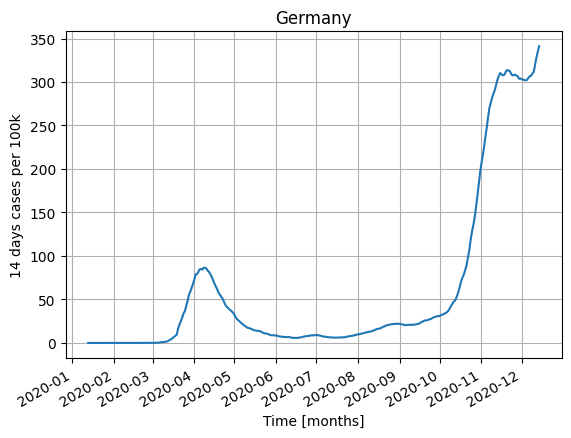

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Date functionality
months = mdates.MonthLocator()  # every month
# Make plot
fig, ax = plt.subplots()  # generate a new plot
ax.plot(time_germany, cc_germany)  # plot data
ax.xaxis.set_major_locator(months)  # modify axis
fig.autofmt_xdate()
plt.grid(True, "both")
plt.title("Germany")
plt.ylabel("14 days cases per 100k")
plt.xlabel("Time [months]")
plt.show()

Now it's time for you to answer the following questions, while using either
pandas dataframes or convert to numpy and Python objects. Wherever possible,
built-in functionality of libraries such as `Numpy`, `Pandas`,`TensorFlow`
or `PyTorch` should be preferred over Python statements as these libraries
are heavily optimized and run much faster than raw Python code in general.
Have a look at the documentation of [numpy] (https://numpy.org/doc/) and
[pandas](https://pandas.pydata.org/docs/getting_started/index.html#getting-started)
if you want to know more. We will work with [numpy](https://numpy.org/doc/)
methods in the next exercises in more detail.

**1.1.1** List the number of the deceased in connection with Covid-19
relative to the population for each country for 2020. What can you say
about the mortality rate? Which country has the highest and which has
the lowest mortality rate? To do this you first have to obtain the information
of population per country for example in a python ``dict``. You may want to use
the following pandas methods (if you don't know them, look them up
at [pandas](https://pandas.pydata.org/docs/getting_started/index.html#getting-started)):
``.unique``, ``.groupby``, ``.mean``, ``.sum``, ``.sort_values``, ``.get_group`` and ``.from_dict``:

In [ ]:
countries = []
population = {}
deaths = {}
rel_deaths = {}
country_max_mortality = ""

countries = corona_countries.unique()#.groupby('countriesAndTerritories').sum()#['countriesAndTerritories']
deaths = corona_world.groupby('countriesAndTerritories')['countriesAndTerritories', 'deaths'].sum()
population = corona_world.groupby('countriesAndTerritories')['countriesAndTerritories', 'popData2019'].mean()

df = pd.concat([deaths, population], axis=1, join="outer")
df = df[df['popData2019'].notnull()]
df['mortality'] = df['deaths'] / df['popData2019']

rel_deaths = df.drop(['deaths', 'popData2019'], axis=1)
country_max_mortality = rel_deaths['mortality'].idxmax()


/var/folders/h3/vm9cxcc5351_xfb_jsfjk4nc0000gn/T/ipykernel_68832/3840662463.py:8: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  deaths = corona_world.groupby('countriesAndTerritories')['countriesAndTerritories', 'deaths'].sum()
/var/folders/h3/vm9cxcc5351_xfb_jsfjk4nc0000gn/T/ipykernel_68832/3840662463.py:8: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  deaths = corona_world.groupby('countriesAndTerritories')['countriesAndTerritories', 'deaths'].sum()
/var/folders/h3/vm9cxcc5351_xfb_jsfjk4nc0000gn/T/ipykernel_68832/3840662463.py:9: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  population = corona_world.groupby('countriesAndTerritories')['

**1.1.2** Plot the cumulative number of cases, deceased and number of recovered
patients for Germany. Make sure that the data has the correct order for a
cumulative sum. You can either again write your own function or simply use
``np.cumsum`` to compute the cumulative sum of the number of cases and deaths
in Germany.

In [ ]:
cum_death = np.cumsum(corona_germany['deaths'])
cum_cases = np.cumsum(corona_germany['cases'])

There has been a discussion in Germany whether the 'second wave' of infections
in the end of 2020 was underestimated by many political leaders. The chancellor
of Germany, Angela Merkel and her team, warned the ministers and the public of
a dire development in the beginning of october. In fact, the large increase of
infections before Christmas turned out to be very serious, even with
counter-measures. We want to see in the next task, if we can correctly predict
the development.

**1.1.3** First we select the data from the plot above between 01.08.2020
and 01.10.2020. Note that we are using numpy arrays with number type ``dtype="datetime64[ns]"``. We can use the package ``datetime`` and its class ``datetime`` for human-readable dates, that can be freely converted into strings, seconds or via ``np.datetime64()`` into numpy's ``dtype="datetime64[ns]"``. We have to select the correct time-period and divide by the delta of ``np.timedelta64(1,"D")`` that corresponds to one day. Finally, we end up with an array counting the days with from 01.08.2020 onwards.

In [ ]:
# Select dates
from datetime import datetime

date_start = datetime(2020, 8, 1)
date_stop = datetime(2020, 10, 1)
selection = np.logical_and(
    time_germany >= np.datetime64(date_start),
    time_germany < np.datetime64(date_stop)
)

# Select training data
delta = np.timedelta64(1, "D")
x_cases = np.array(time_germany[selection] - np.datetime64(date_start)) / delta
y_cases = np.array(cc_germany)[selection]
x_test = time_germany[time_germany >= np.datetime64(date_start)]
x_test_days = (x_test - np.datetime64(date_start)) / delta

Try to fit the data with analytical expressions using for example
``scipy.optimize.curve_fit``. If the fit does not work, try setting bounds
and initial guesses. Try the following relations, with some initial guess for
the free parameters $(a,b,\dots)$. First implement the functions in Python
with the help of ``numpy`` or ``scipy`` methods like:
``np.square``, ``np.exp``, ``np.power``.

* $f_1(x)= ax+b$
* $f_2(x)= c e^{a (x-b)}$
* $f_3(x)= a x^2 + b x + c$
* $f_4(x)= a x^3 + b x^2 + cx + d$
* $\dots$

In [ ]:
# Implement functions.
def fun_1(x, a, b):
    return a * x + b


def fun_2(x, a, b, c):
    #return c * np.exp([a*(x - b)])
    return c*np.exp(a*(x-b)) 


def fun_3(x, a, b, c):
    return a * x * x + b * x + c


def fun_4(x, a, b, c, d):
    return a * x * x * x + b * x * x + c * x + d





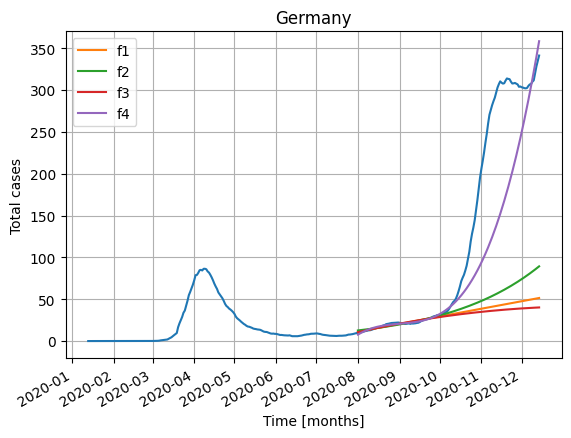

In [ ]:
import scipy.optimize

param_1, _ = scipy.optimize.curve_fit(fun_1, x_cases, y_cases)
param_2, _ = scipy.optimize.curve_fit(fun_2, x_cases, y_cases) # fit fun_2
param_3, _ = scipy.optimize.curve_fit(fun_3, x_cases, y_cases)  # fit fun_3
param_4, _ = scipy.optimize.curve_fit(fun_4, x_cases, y_cases)  # fit fun_4


y_fit_1 = fun_1(x_test_days, *param_1)
y_fit_2 = fun_2(x_test_days, *param_2)
y_fit_3 = fun_3(x_test_days, *param_3)  # evalute fit 3
y_fit_4 = fun_4(x_test_days, *param_4)  # evalute fit 4


fig, ax = plt.subplots()  # generate a new plot
ax.plot(time_germany, cc_germany)  # plot data
ax.plot(x_test, y_fit_1, label="f1")
ax.plot(x_test, y_fit_2, label="f2")
ax.plot(x_test, y_fit_3, label="f3")  # plot data
ax.plot(x_test, y_fit_4, label="f4")  # plot data

ax.xaxis.set_major_locator(months)  # modify axis
fig.autofmt_xdate()
plt.grid(True, "both")
plt.ylim([-20, 370])
plt.legend()
plt.title("Germany")
plt.ylabel("Total cases")
plt.xlabel("Time [months]")
plt.show()  # make plot

Which function extrapolates best to the subsequent development starting
from 01.10.2020 to the end of the year? Can you quantify? Does this change
if you only fit to the last 14 days from 17.09.2020 to the 01.10.2020?
Which is the best function for 14 days extrapolation. Can you explain?

4
7790.646949858704


/opt/homebrew/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:881: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


32443.581419123264
3
True


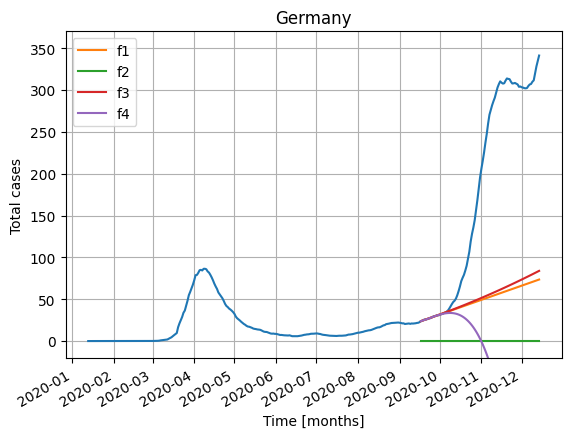

In [272]:
answer_best_fun = None  # number of best function (int)
answer_change_14_days = None  # Does it change, answer with "True" or "False" (bool)
answer_best_fun_14_days = None  # best function within 14 days fit (int)
answer_explanation = ""  # Answer as string in free text.

from sklearn.metrics import mean_squared_error

y_test = np.array(cc_germany)[time_germany >= np.datetime64(date_stop)]

minErr = mean_squared_error(y_test, y_fit_1[-75:])
number = 1
for y_fit in [y_fit_1, y_fit_2, y_fit_3, y_fit_4]:
    y_fit = y_fit[-75:]
    err = mean_squared_error(y_test, y_fit)
    if (err < minErr):
        minErr = err
        answer_best_fun = number
    number = number + 1

print(answer_best_fun)
print(minErr)


#Fitting to last 14 days
# Select dates
from datetime import datetime

date_start_14days = datetime(2020, 9, 17)
date_stop_14days = datetime(2020, 10, 1)
selection_14days = np.logical_and(
    time_germany >= np.datetime64(date_start_14days),
    time_germany < np.datetime64(date_stop_14days)
)

x_cases_14days = np.array(time_germany[selection_14days] - np.datetime64(date_start_14days)) / delta
y_cases_14days = np.array(cc_germany)[selection_14days]
x_test = time_germany[time_germany >= np.datetime64(date_start_14days)]
x_test_days = (x_test - np.datetime64(date_start_14days)) / delta

param_1_14days, _ = scipy.optimize.curve_fit(fun_1, x_cases_14days, y_cases_14days)
param_2_14days, _ = scipy.optimize.curve_fit(fun_2, x_cases_14days, y_cases_14days) # fit fun_2
param_3_14days, _ = scipy.optimize.curve_fit(fun_3, x_cases_14days, y_cases_14days)  # fit fun_3
param_4_14days, _ = scipy.optimize.curve_fit(fun_4, x_cases_14days, y_cases_14days)  # fit fun_4

y_fit_1_14days = fun_1(x_test_days, *param_1_14days)
y_fit_2_14days = fun_2(x_test_days, *param_2_14days)
y_fit_3_14days = fun_3(x_test_days, *param_3_14days)  # evalute fit 3
y_fit_4_14days = fun_4(x_test_days, *param_4_14days)  # evalute fit 4


minErr = mean_squared_error(y_test, y_fit_1_14days[-75:])
number = 1
for y_fit in [y_fit_1_14days, y_fit_2_14days, y_fit_3_14days, y_fit_4_14days]:
    y_fit = y_fit[-75:]
    err = mean_squared_error(y_test, y_fit)
    if (err < minErr):
        minErr = err
        answer_best_fun_14_days = number
    number = number + 1

print(minErr)
print(answer_best_fun_14_days)
answer_change_14_days = answer_best_fun != answer_best_fun_14_days

print(answer_change_14_days)
# Select training data
# delta = np.timedelta64(1, "D")
# x_cases_14days = np.array(time_germany[selection_14days] - np.datetime64(date_start_14days)) / delta
# y_cases_14days = np.array(cc_germany)[selection_14days]
# x_test = time_germany[time_germany >= np.datetime64(date_start_14days)]
# x_test_days = (x_test - np.datetime64(date_start_14days)) / delta

# y_test = np.array(cc_germany)[time_germany >= np.datetime64(date_stop_14days)]

# minErr = mean_squared_error(y_test, y_fit_1[-75:])
# number = 1
# for y_fit in [y_fit_1, y_fit_2, y_fit_3, y_fit_4]:
#     y_fit = y_fit[-75:]
#     err = mean_squared_error(y_test, y_fit)
#     if (err < minErr):
#         minErr = err
#         answer_best_fun_14_days = number
#     number = number + 1
# print(answer_best_fun_14_days)
# print(minErr)

fig, ax = plt.subplots()  # generate a new plot
ax.plot(time_germany, cc_germany)  # plot data
ax.plot(x_test, y_fit_1_14days, label="f1")
ax.plot(x_test, y_fit_2_14days, label="f2")
ax.plot(x_test, y_fit_3_14days, label="f3")  # plot data
ax.plot(x_test, y_fit_4_14days, label="f4")  # plot data

ax.xaxis.set_major_locator(months)  # modify axis
fig.autofmt_xdate()
plt.grid(True, "both")
plt.ylim([-20, 370])
plt.legend()
plt.title("Germany")
plt.ylabel("Total cases")
plt.xlabel("Time [months]")
plt.show()  # make plot

**1.1.4** Finally, let us also try some machine learning to fit the data.
You don't need to understand the code in detail, yet. We fit a small neural
network on the time series prediction. We will have the neural network train
on 14 previous days to predict the change of infections for the next day in
the time period between 01.08.2020 and 01.10.2020. And then to predict the
next days from 01.10.2020 onward. This is by far not a sophisticated model.
We will learn more methods in the lectures.

In [280]:

from sklearn.neural_network import MLPRegressor

# Prepare and run training
step_size = 14
x_train = np.array(
    [y_cases[i:i + step_size] for i in range(len(x_cases) - step_size)]
)
y_train = np.array(
    [y_cases[step_size + i] - y_cases[step_size + i - 1]
     for i in range(len(x_cases) - step_size)]
)
nn = MLPRegressor(
    hidden_layer_sizes=(100, 100), random_state=1, max_iter=500
).fit(x_train, y_train)

# Predict the time-series
y_test = y_cases[-step_size:]
y_val = y_cases[:step_size]
days_to_predict = 30
for _ in range(days_to_predict):
    next_step = nn.predict(
        np.expand_dims(y_test[-step_size:], axis=0)
    ) + y_test[-1]
y_test = np.concatenate([y_test, next_step], axis=0)
next_step = nn.predict(np.expand_dims(y_val[-step_size:], axis=0)) + y_val[-1]
y_val = np.concatenate([y_val, next_step], axis=0)

# Make time values for y_val and y_test
delta = np.timedelta64(1, "D")
x_test = np.arange(len(y_test)) * delta + np.datetime64(
    date_stop)
x_val = np.arange(len(y_val)) * delta + np.datetime64(
    date_start)

Plot the corona infections and evaluate the predictions for ``x_test``,
``x_val`` and ``y_test``, ``y_val`` with the ground truth. You can play around with the hyper-parameters (parameters not optimized in training but used to control the learning process) and see how the result changes. What are problems and how would you improve the Machine Learning model?

In [279]:
#print(x_test)

print(x_val)
answer_nn = ""
# YOUR CODE HERE
#raise NotImplementedError()

['2020-08-01T00:00:00.000000' '2020-08-02T00:00:00.000000'
 '2020-08-03T00:00:00.000000' '2020-08-04T00:00:00.000000'
 '2020-08-05T00:00:00.000000' '2020-08-06T00:00:00.000000'
 '2020-08-07T00:00:00.000000' '2020-08-08T00:00:00.000000'
 '2020-08-09T00:00:00.000000' '2020-08-10T00:00:00.000000'
 '2020-08-11T00:00:00.000000' '2020-08-12T00:00:00.000000'
 '2020-08-13T00:00:00.000000' '2020-08-14T00:00:00.000000'
 '2020-08-15T00:00:00.000000']


In [273]:
# Tests for auto-grading (check variables to be graded).
assert isinstance(countries, list) or isinstance(countries, np.ndarray)
assert isinstance(rel_deaths, dict)
assert isinstance(population, dict)
assert isinstance(deaths, dict)
assert isinstance(country_max_mortality, str)

AssertionError: 

In [264]:
assert isinstance(cum_death, np.ndarray)
assert isinstance(cum_cases, np.ndarray)

AssertionError: 

In [265]:
assert fun_1(0, 0, 0) == 0
assert fun_2(0, 0, 0, 0) == 0
assert fun_3(0, 0, 0, 0) == 0
assert fun_4(0, 0, 0, 0, 0) == 0

In [266]:
assert param_1 is not None
assert param_2 is not None
assert param_3 is not None
assert param_4 is not None
assert isinstance(answer_best_fun, int)
assert isinstance(answer_change_14_days, bool)
assert isinstance(answer_best_fun_14_days, int)
assert isinstance(answer_explanation, str)

In [269]:
assert isinstance(answer_nn, str)

## 1.2 Snake Game (not graded)

In this exercise you will implement the retro game [Snake](https://en.wikipedia.org/wiki/Snake_(video_game_genre)) to learn Python. There are already many tutorials and possible ways to do this on the web. You can consult [https://www.edureka.co/blog/snake-game-with-pygame/](https://www.edureka.co/blog/snake-game-with-pygame/) or [https://pythonspot.com/snake-with-pygame/](https://pythonspot.com/snake-with-pygame/) if you get stuck. For this implementation, we need ``pygame``. If you did not install the package in the preliminaries above, you have to do it now. Start with this backbone. You have to implement the functions ``generate_food_position``, ``move_snake``, ``check_crash_walls`` and ``check_crash_self`` yourself to do the following tasks.Note that you have to take care of limiting the length in the move of the snake.

* Game Over when snake hits the boundaries.
* Adding the food: Snake can eat randomly spawning pixels.
* Increasing the length of the snake.
* Displaying the Score at the end.

How does this relate to Machine learning? Reinforcement learning [(RL)](https://en.wikipedia.org/wiki/Reinforcement_learning) is a field of machine learning that trains intelligent agents to choose actions in an environment in order to maximize a certain reward. Very often nerual networks are used by agents to choose the best action. Lots of methods and adavances in RL are tested with games. In this case, an AI is to be trained to play the game targeted to achieve the highest score/ the longest snake before crashing. 

In [ ]:
import pygame
import random

# Some global parameters to define color, sizes etc.
white = (255, 255, 255)
yellow = (255, 255, 102)
black = (0, 0, 0)
red = (213, 50, 80)
green = (0, 255, 0)
blue = (50, 153, 213)
dis_width = 600
dis_height = 400
snake_block = 10  # size of a snake segment
snake_speed = 15  # speed


def Your_score(score):
    """Print the score on screen."""
    score_font = pygame.font.SysFont("comicsansms", 15)
    value = score_font.render("Your Score: " + str(score), True, yellow)
    dis.blit(value, [0, 0])


def message(msg, color):
    font_style = pygame.font.SysFont("bahnschrift", 25)
    mesg = font_style.render(msg, True, color)
    dis.blit(mesg, [dis_width / 6, dis_height / 3])


def draw_our_snake(snake_block, snake_list):
    """Draw the snake."""
    for x in snake_list:
        pygame.draw.rect(dis, black, [x[0], x[1], snake_block, snake_block])


def generate_food_position():
    """Make random food position."""
    # @TODO: Make random position
    foodx = 0
    foody = 0
    # YOUR CODE HERE
    raise NotImplementedError()
    return [foodx, foody]


def move_snake(snake_List, snake_Head, Length_of_snake, do_append=True):
    """Move the snake with new head"""
    if do_append:
        snake_List.append(snake_Head)
    # @TODO: Limit the snake list to fix length
    # YOUR CODE HERE
    raise NotImplementedError()


def check_crash_walls(x1, y1):
    """Check if it hits the wall"""
    crash_detect = False
    # @TODO: Check Wall collision
    # YOUR CODE HERE
    raise NotImplementedError()
    return crash_detect


def check_crash_self(snake_List, snake_Head):
    """Check if snake crashed in itself."""
    found_crash = False
    # @TODO: Check Self collision
    # YOUR CODE HERE
    raise NotImplementedError()
    return found_crash


def game_loop():
    game_over = False
    game_close = False

    x1 = dis_width / 2
    y1 = dis_height / 2

    x1_change = 0
    y1_change = 0

    snake_list = []  # list of coordinates [[x1, y1], [x1, y1], ...]
    length_of_snake = 1

    food_x, food_y = generate_food_position()

    while not game_over:
        while game_close:
            dis.fill(blue)
            message("You Lost! Press C-Play Again or Q-Quit", red)
            Your_score(length_of_snake - 1)
            pygame.display.update()

            for event in pygame.event.get():
                if event.type == pygame.KEYDOWN:
                    if event.key == pygame.K_q:
                        game_over = True
                        game_close = False
                    if event.key == pygame.K_c:
                        game_loop()

        for event in pygame.event.get():
            if event.type == pygame.QUIT:
                game_over = True
            if event.type == pygame.KEYDOWN:
                if event.key == pygame.K_LEFT and x1_change != snake_block:
                    x1_change = -snake_block
                    y1_change = 0
                elif event.key == pygame.K_RIGHT and x1_change != -snake_block:
                    x1_change = snake_block
                    y1_change = 0
                elif event.key == pygame.K_UP and y1_change != snake_block:
                    y1_change = -snake_block
                    x1_change = 0
                elif event.key == pygame.K_DOWN and y1_change != -snake_block:
                    y1_change = snake_block
                    x1_change = 0

        if check_crash_walls(x1, y1):
            game_close = True
        x1 += x1_change
        y1 += y1_change

        dis.fill(blue)
        pygame.draw.rect(dis, green,
                         [food_x, food_y, snake_block, snake_block])

        snake_head = [x1, y1]
        move_snake(snake_list, snake_head, length_of_snake)

        if check_crash_self(snake_list, snake_head):
            game_close = True

        draw_our_snake(snake_block, snake_list)
        Your_score(length_of_snake - 1)

        pygame.display.update()

        if x1 == food_x and y1 == food_y:
            food_x, food_y = generate_food_position()
            length_of_snake += 1

        clock.tick(snake_speed)

    pygame.quit()
    # quit()


Add the tasks to the game and have fun playing :) To test your implementation set ``run_game = True`` and execute cell.

In [ ]:
run_game = False  # please submit you answer with run_game = False
if run_game:
    pygame.init()
    dis = pygame.display.set_mode((dis_width, dis_height))
    pygame.display.set_caption("Snake Game")
    clock = pygame.time.Clock()
    game_loop()

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()